# Definicion Y concepto de truncamiento en Distribuciones
El **truncamiento** de una distribución consiste en restringir su dominio a un intervalo específico, $[a, b]$, de modo que sólo se consideren los valores de la variable aleatoria que se encuentren en ese rango, descartando todos los demás valores fuera de él.

## ¿En qué consiste el truncamiento?

Cuando truncamos una distribución, hacemos lo siguiente:

1. **Selección del intervalo:**  
   Se define un intervalo $[a, b]$ donde la distribución es considerada. Los valores de la variable que se encuentren fuera de este rango se eliminan.

2. **Re-normalización:**  
   Debido a que se han eliminado algunas partes de la distribución original, la función de densidad debe ser ajustada para que la probabilidad total en el intervalo $[a, b]$ sea igual a 1. Esto se logra dividiendo la densidad original por la probabilidad acumulada en el intervalo, es decir, $( F(b) - F(a) )$.

## Formulas del truncamiento

Si la distribución original tiene una función de densidad $( f(x) )$ y una función de distribución acumulada $( F(x) )$, la función de densidad truncada se define como:

$$
f_{\text{trunc}}(x) = \begin{cases}
\frac{f(x)}{F(b) - F(a)} & \text{si } a \leq x \leq b, \\
0 & \text{en otro caso.}
\end{cases}
$$

y la función de distribución acumulada truncada es:

$$
F^*(x) = \begin{cases}
0 & \text{si } x < a, \\
\frac{F(x) - F(a)}{F(b) - F(a)} & \text{si } a \leq x \leq b, \\
1 & \text{si } x > b.
\end{cases}
$$

## ¿Por qué utilizar el truncamiento?

- **Limitaciones físicas o de observación:**  
  En muchos casos, la variable de interés sólo puede tomar valores dentro de un rango específico.  
- **Eliminación de colas extremas:**  
  Puede ser útil para evitar el efecto de colas muy largas o valores atípicos en el análisis.
- **Mejora en el modelado:**  
  Al concentrarse en el rango de interés, se pueden obtener modelos más precisos para ciertos fenómenos.

  A continuacion se hare un ejercicio con distribucion normal truncada.

## Librerías

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

## Parámetros y funciones de la distribución normal

In [6]:
mu = 12
sigma = 2

# Rango para graficar la distribución normal completa
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000) # 4 desviaciones estándar a cada lado de la media
pdf = norm.pdf(x, mu, sigma) # Función de densidad de probabilidad
cdf = norm.cdf(x, mu, sigma) # Función de distribución acumulada

## Graficar PDF y CDF de la normal

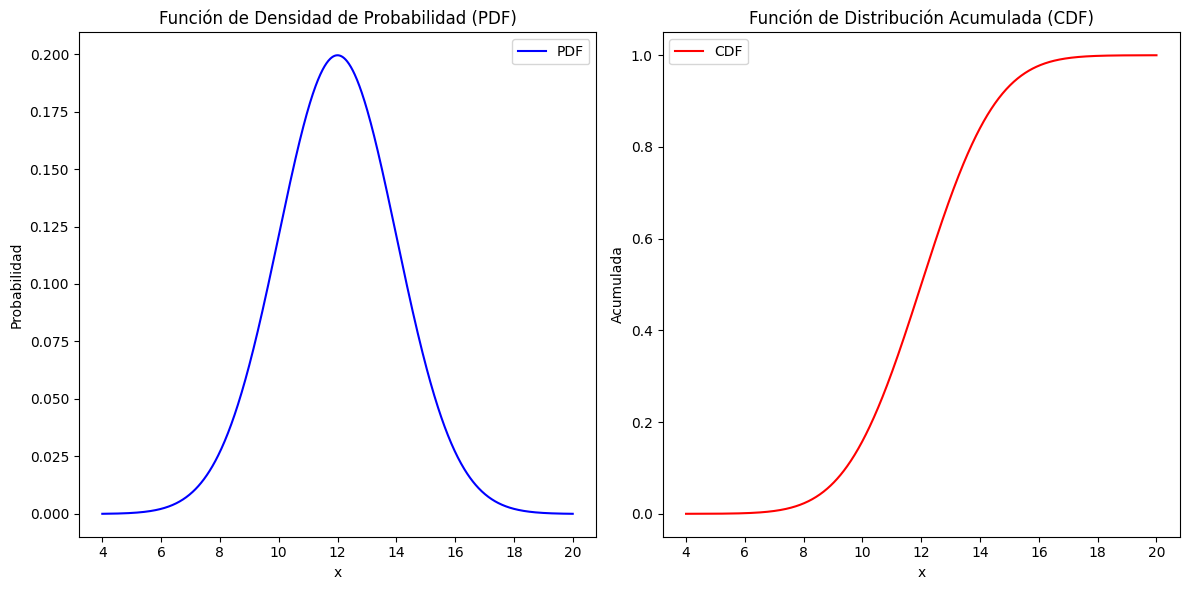

In [7]:
plt.figure(figsize=(12, 6)) # Tamaño de la figura en pulgadas

plt.subplot(1, 2, 1) # Subgráfica 1x2, primera subgráfica
plt.plot(x, pdf, label="PDF", color='blue')
plt.title("Función de Densidad de Probabilidad (PDF)")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label="CDF", color='red')
plt.title("Función de Distribución Acumulada (CDF)")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()

## Truncamiento

In [8]:
# --- Distribución truncada ---
# Definimos los límites de truncamiento (modificalos según lo que necesites)
a, b = -1, 1

# Para truncnorm, los parámetros a y b deben estar estandarizados: (limite - mu) / sigma
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma
print(f"Límites estandarizados: a={a_std}, b={b_std}")

# Creamos la distribución normal truncada
trunc_dist = truncnorm(a_std, b_std, loc=mu, scale=sigma) # loc=mu (media), scale=sigma (desviación estándar) son los parámetros de la normal

# Valores para la gráfica en el rango truncado
x_trunc = np.linspace(a, b, 1000)
pdf_trunc = trunc_dist.pdf(x_trunc)
cdf_trunc = trunc_dist.cdf(x_trunc)

Límites estandarizados: a=-6.5, b=-5.5


## Graficar PDF y CDF de la normal truncada

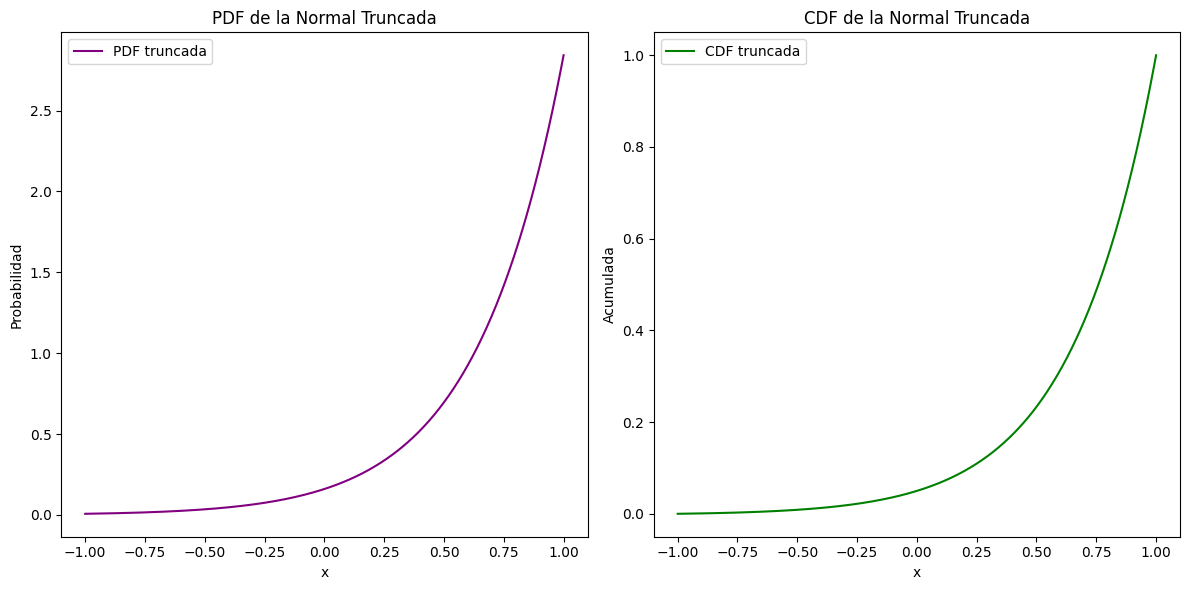

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_trunc, pdf_trunc, label="PDF truncada", color='purple')
plt.title("PDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_trunc, cdf_trunc, label="CDF truncada", color='green')
plt.title("CDF de la Normal Truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()


## Calculos de probabilidad

In [10]:
# Calcular probabilidad de que x esté entre 0 y 1 para la distribución normal completa
p_normal = norm.cdf(1, mu, sigma) - norm.cdf(0.5, mu, sigma)
print("Probabilidad en la distribución normal entre 0 y 1:", p_normal)

# Calcular probabilidad de que x esté entre 0 y 1 para la distribución truncada
p_trunc = trunc_dist.cdf(1) - trunc_dist.cdf(0.5)
print("Probabilidad en la distribución truncada entre 0 y 1:", p_trunc)


Probabilidad en la distribución normal entre 0 y 1: 1.4527390011986074e-08
Probabilidad en la distribución truncada entre 0 y 1: 0.7666410612479242
